In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Set the style for seaborn
sns.set(style="whitegrid")

In [8]:
# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
gender_submission_df = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')

In [9]:
# Display the first few rows of the training dataset
print("Training Data:")
print(train_df.head())

Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [10]:
# Display the first few rows of the test dataset
print("\nTest Data:")
print(test_df.head())


Test Data:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [11]:
# Display the first few rows of the gender submission dataset
print("\nGender Submission Data:")
print(gender_submission_df.head())


Gender Submission Data:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [12]:
# Data Overview
print("\nTraining Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

In [13]:
# Descriptive statistics
print("\nTraining Data Description:")
print(train_df.describe())


Training Data Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [14]:
# Survival Rate
survival_rate = train_df['Survived'].mean() * 100
print(f"\nSurvival Rate: {survival_rate:.2f}%")


Survival Rate: 38.38%


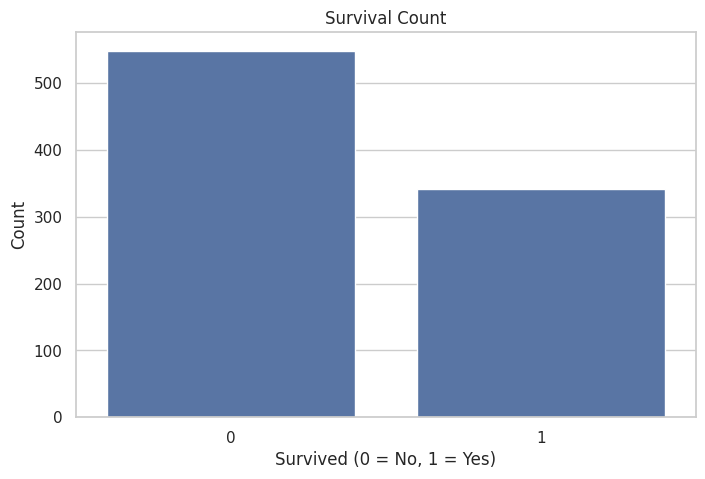

In [15]:
# Visualizing the survival rate
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

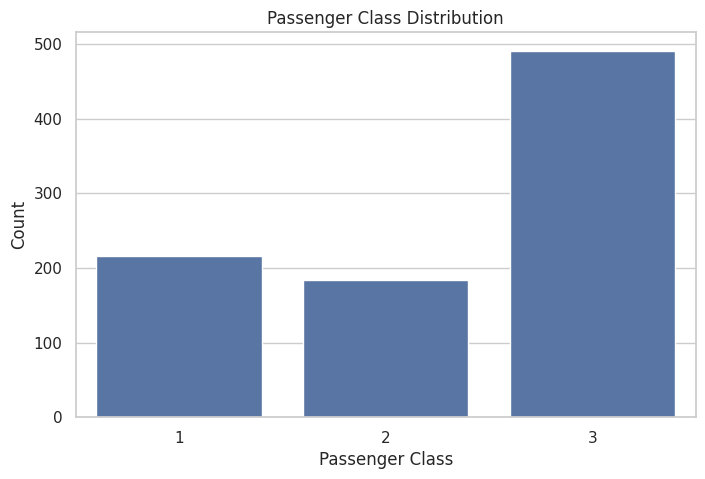

In [16]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

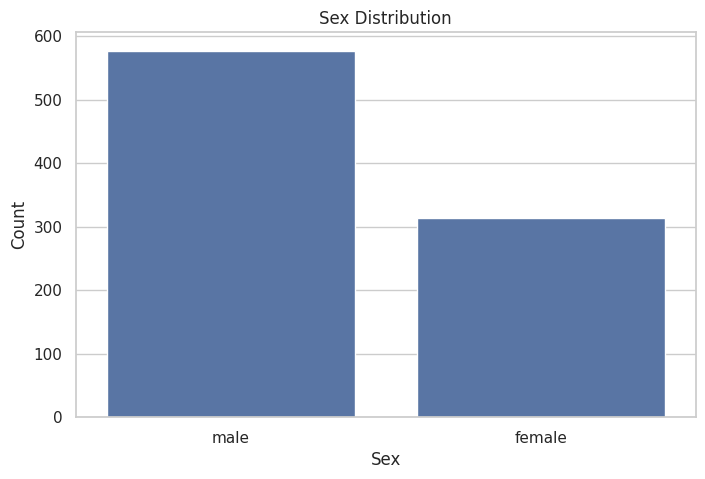

In [17]:
# Sex Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=train_df)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

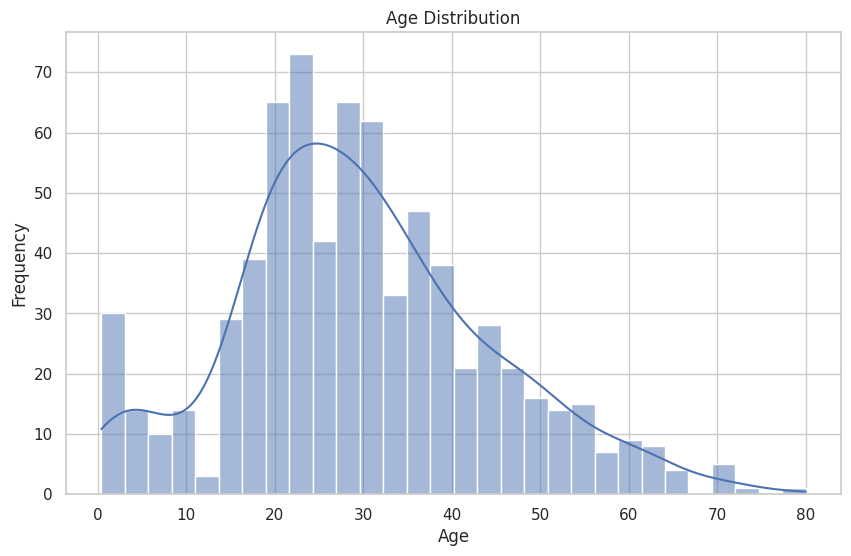

In [18]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

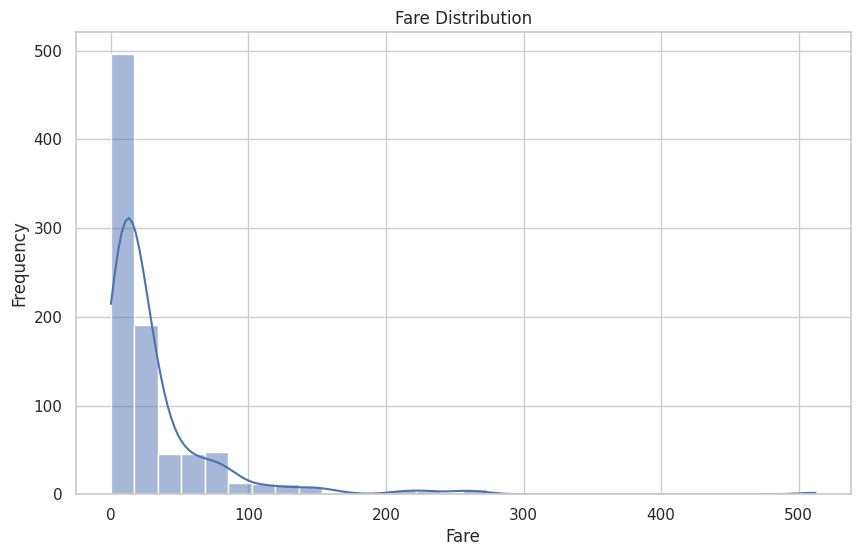

In [19]:
# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

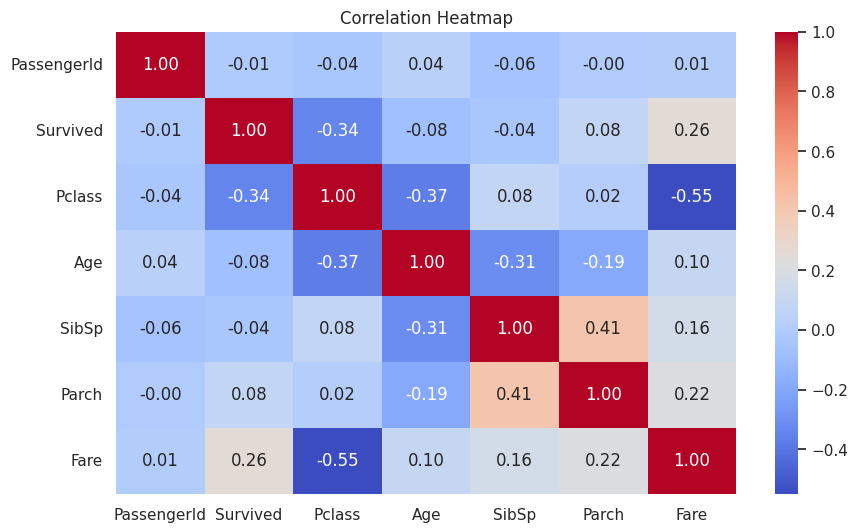

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
# Select only numeric features for correlation calculation
numeric_features = train_df.select_dtypes(include=['number'])
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

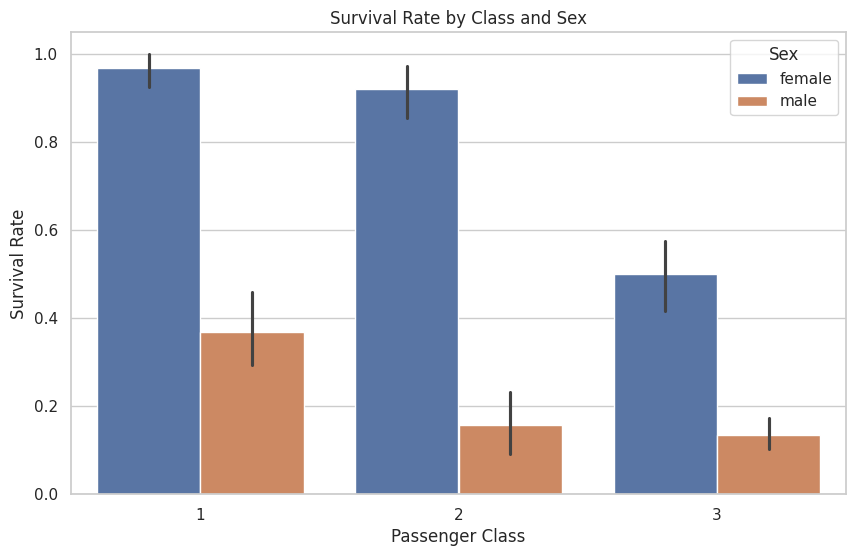

In [22]:
# Survival by Class and Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df)
plt.title('Survival Rate by Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

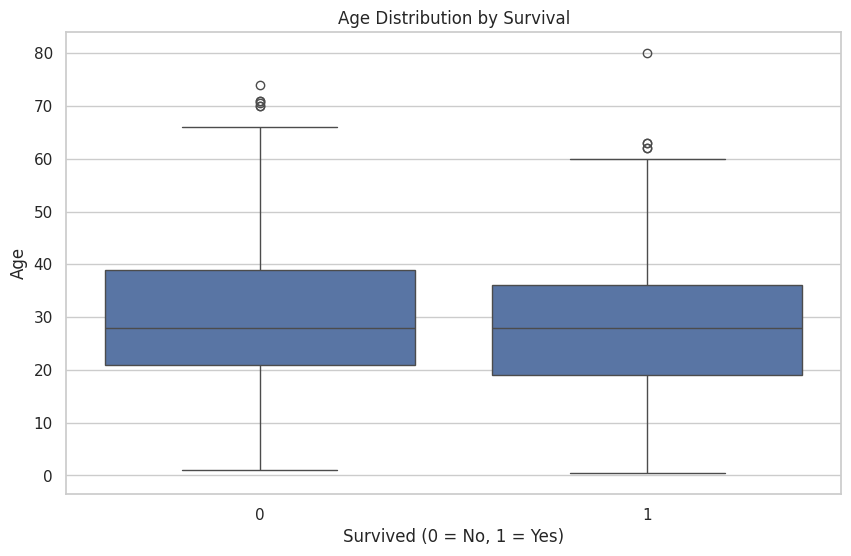

In [23]:
# Survival by Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

In [24]:
# Summary of Findings
print("\nSummary of Findings:")
print("1. The overall survival rate is {:.2f}%.".format(survival_rate))
print("2. Most passengers are in Class 3.")
print("3. There are more male passengers than female.")
print("4. The average age of passengers is around {:.2f} years.".format(train_df['Age'].mean()))
print("5. The fare distribution shows a right skew, indicating some passengers paid significantly more.")


Summary of Findings:
1. The overall survival rate is 38.38%.
2. Most passengers are in Class 3.
3. There are more male passengers than female.
4. The average age of passengers is around 29.70 years.
5. The fare distribution shows a right skew, indicating some passengers paid significantly more.


In [26]:
# Save the cleaned data if needed
train_df.to_csv('/content/drive/MyDrive/cleaned_train_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/cleaned_test_data.csv', index=False)